In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
#import tikzplotlib

In [2]:
sp.init_printing()

In [3]:
E,A,l,h = sp.symbols('E A l h')

In [4]:
K = sp.Matrix([[1,-1,0,0,0],[-1,2,-1,0,0],[0,-1,2,-1,0],[0,0,-1,2,-1],[0,0,0,-1,1]])

In [5]:
print(sp.latex(K,mode='inline'))

$\left[\begin{smallmatrix}1 & -1 & 0 & 0 & 0\\-1 & 2 & -1 & 0 & 0\\0 & -1 & 2 & -1 & 0\\0 & 0 & -1 & 2 & -1\\0 & 0 & 0 & -1 & 1\end{smallmatrix}\right]$


In [31]:
#K = 4*np.matrix([[1,-1,0,0,0],[-1,2,-1,0,0],[0,-1,2,-1,0],[0,0,-1,2,-1],[0,0,0,-1,1]])
K = 4*np.matrix([[1,0,0,0,0],[-1*0,2,-1,0,0],[0,-1,2,-1,0],[0,0,-1,2,-1],[0,0,0,-1,1]])

In [32]:
K

matrix([[ 4,  0,  0,  0,  0],
        [ 0,  8, -4,  0,  0],
        [ 0, -4,  8, -4,  0],
        [ 0,  0, -4,  8, -4],
        [ 0,  0,  0, -4,  4]])

In [33]:
eigvals,eigvecs = np.linalg.eig(K)

In [34]:
idx = np.argsort(eigvals)  # For ascending order; use -eigvals for descending order

# Sort eigenvalues and eigenvectors
sorted_eigvals = eigvals[idx]
sorted_eigvecs = eigvecs[:, idx]

In [35]:
sorted_eigvals

array([ 0.48245903,  4.        ,  4.        ,  9.38918542, 14.12835554])

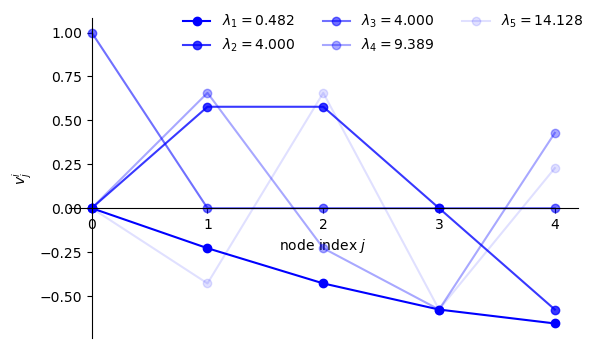

In [36]:
fig, ax = plt.subplots(figsize=(6,3.5))
for i in range(len(sorted_eigvals)):
    ax.plot(sorted_eigvecs[:, i], marker='o', color='blue', 
            alpha=1 - i * 0.22, label=r'$\lambda_{%i} = %.3f$' %(i+1,sorted_eigvals[i]))# Decrease opacity

# Remove the frame (spines) and leave only left and bottom axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Set x-axis to integer values only
ax.set_xticks(range(len(sorted_eigvecs)))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
ax.set_xlabel(r'node index $j$')
ax.set_ylabel(r'$v^i_j$')
legend=fig.legend(ncols=3)
legend.get_frame().set_facecolor('none')  # Fully transparent background
legend.get_frame().set_edgecolor('none')  # No border
#tikzplotlib.save("FE_simple.tex")
fig.tight_layout()
fig.savefig('FE_simple_bc.pdf')

In [37]:
#K[1,0] = 0
K

matrix([[ 4,  0,  0,  0,  0],
        [ 0,  8, -4,  0,  0],
        [ 0, -4,  8, -4,  0],
        [ 0,  0, -4,  8, -4],
        [ 0,  0,  0, -4,  4]])

In [38]:
F = np.zeros((5,1))
F[-1] = 0.1

In [39]:
u = np.linalg.solve(K,F)

In [40]:
u

array([[0.   ],
       [0.025],
       [0.05 ],
       [0.075],
       [0.1  ]])

In [41]:
L = np.diag(sorted_eigvals)
V = sorted_eigvecs
Vi = np.linalg.inv(sorted_eigvecs)

np.dot(V,np.dot(np.linalg.inv(L),np.dot(Vi,F)))

matrix([[0.   ],
        [0.025],
        [0.05 ],
        [0.075],
        [0.1  ]])

In [42]:
ev = V[:,0]
sol=(np.dot(ev.T,F)/sorted_eigvals[0])[0,0]*ev


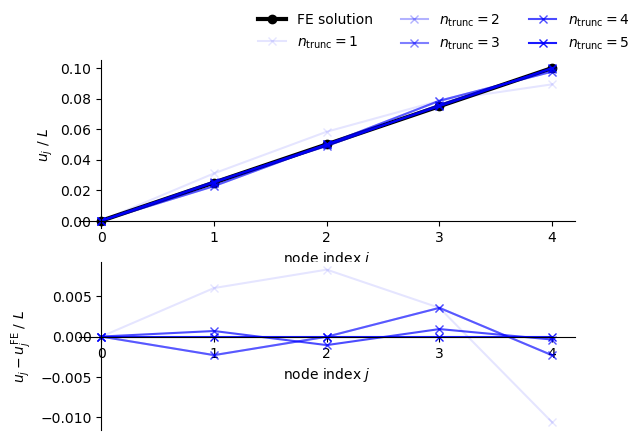

In [43]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(u,marker='o',color='black',lw=3,label='FE solution')
for i in range(0,len(sorted_eigvals)):
    max_modes = i+1
    a = np.dot(V[:,0:max_modes],np.dot(np.linalg.inv(L[0:max_modes,0:max_modes]),np.dot(Vi[0:max_modes,:],F)))
    ax[0].plot(a,marker='x',color='blue', alpha=i * 0.2+0.1, 
               label=r'$n_\mathrm{trunc} = %i$' %(max_modes))
    ax[1].plot(a-u,marker='x',color='blue', alpha=i * 0.2+0.1)

    
for i in range(2):
    # Remove the frame (spines) and leave only left and bottom axes
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

    # Set x-axis to integer values only
    ax[i].set_xticks(range(len(sorted_eigvecs)))
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    ax[i].set_xlabel('node index $j$')
ax[0].set_ylabel(r'$u_j$ / $L$')
ax[1].set_ylabel(r'$u_j - u_j^\mathrm{FE}$ / $L$')
legend=fig.legend(ncols=3)
legend.get_frame().set_facecolor('none')  # Fully transparent background
legend.get_frame().set_edgecolor('none')  # No border
#tikzplotlib.save("FE_simple.tex")
fig.savefig('FE_modes.pdf')

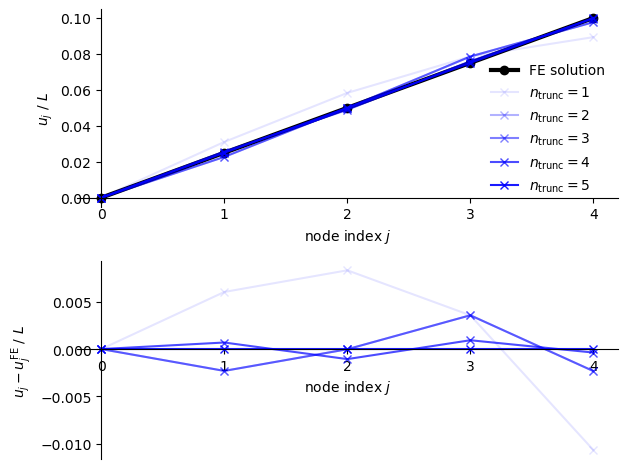

In [44]:
ev = V[:,0]
sol= u * 0

fig, ax = plt.subplots(nrows=2)
ax[0].plot(u,marker='o',color='black',lw=3,label='FE solution')
for i in range(0,len(sorted_eigvals)):
    max_modes = i+1
    ev = V[:,i]
    sol += (np.dot(ev.T,F)/sorted_eigvals[i])[0,0]*ev
    ax[0].plot(sol,marker='x',color='blue', alpha=i * 0.2+0.1, 
               label=r'$n_\mathrm{trunc} = %i$' %(max_modes))
    ax[1].plot(sol-u,marker='x',color='blue', alpha=i * 0.2+0.1)

    
for i in range(2):
    # Remove the frame (spines) and leave only left and bottom axes
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')

    # Set x-axis to integer values only
    ax[i].set_xticks(range(len(sorted_eigvecs)))
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
    ax[i].set_xlabel('node index $j$')
ax[0].set_ylabel(r'$u_j$ / $L$')
ax[1].set_ylabel(r'$u_j - u_j^\mathrm{FE}$ / $L$')
legend=ax[0].legend(ncols=1,loc='lower right')
legend.get_frame().set_facecolor('none')  # Fully transparent background
legend.get_frame().set_edgecolor('none')  # No border
#tikzplotlib.save("FE_simple.tex")
fig.tight_layout()
fig.savefig('FE_modes.pdf')